# Lab 3 : Diving Into Quantum Algorithms
***

## Section 1: QPE


<img src="./resources/qpe_tex_qz.png" alt="QPE Circuit" style="width: 800px;"/>


As a reminder to you, the above figure outlines the Quantum Phase Estimation (QPE) circuit.  Below, we'll provide a few import statements and functions that you'll use throughout the lab.

In [1]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import math
from math import gcd



In [2]:
#QFT Circuit
def qft(n):
    """Creates an n-qubit QFT circuit"""
    circuit = QuantumCircuit(n)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
    
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

#Inverse Quantum Fourier Transform
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    
    return qc

### Step 1: Set up a QPE Circuit with four counting qubits



Let's pick a phase gate with $\theta = \frac{1}{3}$ as a simple example unitary to test creating a QPE circuit.  Here we'll use Qiskit's `PhaseGate` which applies $P|1\rangle{}=e^{i\lambda}|1\rangle{}$.  Since we want to examine QPE under a unitary with the form $U|1\rangle{}=e^{i2\pi \theta}$, we should set $\lambda=\frac{2\pi}{3}$.

Create a QPE circuit with four counting qubits and name the circuit `qpe4`.  It may be helpful to define two `QuantumRegister` objects, one for the "system" where the unitary will be applied and one for where the phase information will be stored.  Feel free to reference the Qiskit Textbook's chapter on [Quantum Phase Estimation](https://learn.qiskit.org/course/ch-algorithms/quantum-phase-estimation#getting_more_precision).

It should look something like this (note that because Qiskit uses little endian notation, the ordering of the controlled-$U$ gates are different):

<img src="./resources/qpe4_circuit.png" alt="QPE 4 Phase Circuit" style="width: 1000px;"/>


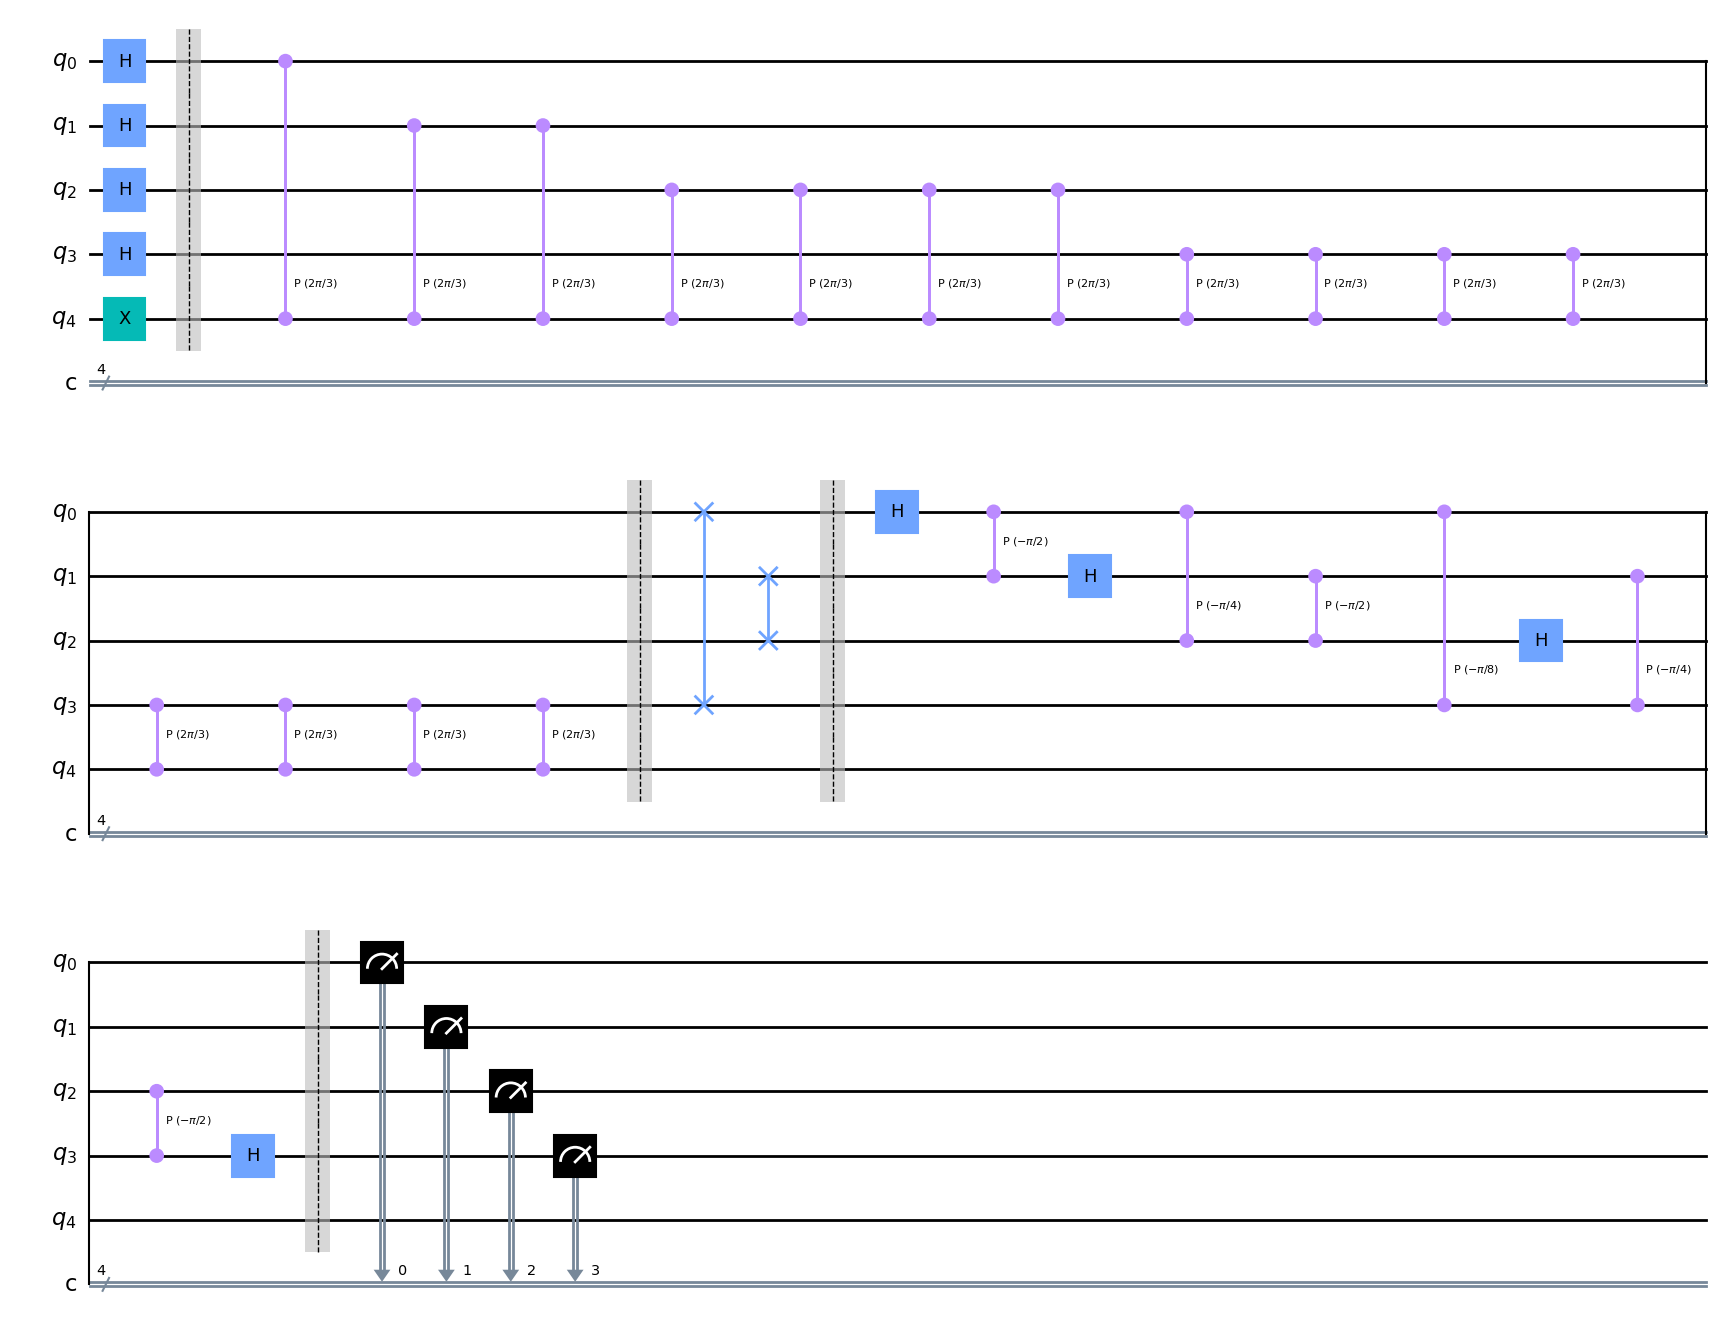

In [3]:
# define the size n of the quantum register to
# store the phase information
phase_register_size = 4

# create a quantum circuit with a quantum register
# with n qubits and a classical register with n bits,
# to implement the Quantum Phase Estimation (QPE) for n = 4 qubits
qpe4 = QuantumCircuit( ( phase_register_size + 1 ),
                         phase_register_size )


####################################################

#### insert your code here ####


# define the function to perform the Quantum Hadamard Transform on
# the n qubits of the quantum register of the quantum circuit
# implementing the Quantum Phase Estimation (QPE)
def apply_quantum_hadamard_transform( circuit, n ):    
    
    # for each qubit of the quantum register of the quantum circuit
    # implementing the Quantum Phase Estimation (QPE) for n qubits
    for qubit_idx in range(n):
        
        # apply the Hadamard gate to the current ith qubit
        circuit.h(qubit_idx)


# define the function to perform the Controlled-Phase gates on
# the n qubits of the quantum register of the quantum circuit
# implementing the Quantum Phase Estimation (QPE),
# as part of the Quantum Fourier Transform (QFT)
def apply_controlled_phases( theta, circuit, n ):
    
    # for each ith step according to
    # the number of n qubits used
    for step in range(n):
        
        # compute the iteration parameter t
        # as a power of 2, according to the current step
        t = 2**step
        
        
        # for each iteration according to
        # the iteration parameter t
        for _ in range(t):

            # apply the Controlled-Phase gate for the theta angle,
            # with control on the ith qubit and target on the last qubit
            circuit.cp( theta, step, n )  


# define the function to perform the Swap gates on
# the n qubits of the quantum register of the quantum circuit
# implementing the Quantum Phase Estimation (QPE),
# as part of the Quantum Fourier Transform (QFT)
def apply_swaps( circuit, n ):
    
    # for a number of iterations equal to half of
    # the number of phase counting qubits used
    # on the resepective quantum circuit
    # for the Quantum Fourier Transform (QFT)
    for qubit_idx in range( phase_register_size // 2 ):
         
        # apply the Swap gate between the kth qubit and
        # the (n - k)th qubit on the quantum register defined before
        circuit.swap( qubit_idx, ( n - qubit_idx - 1 ) )
        

# define the function to perform
# the Inverse Quantum Fourier Transform (IQFT) on
# the n qubits of the quantum register of the quantum circuit
# implementing the Quantum Phase Estimation (QPE)
def apply_quantum_fourier_transform_inverse( circuit, n ):
    
    # for each qubit on the quantum register
    for j in range(n):
        
        # for each additional mth qubit ranging to
        # the current jth qubit being iterated before
        for m in range(j):
            
            # apply the Controlled-Phase gate for
            # the theta angle equal to -pi / ( 2^( j - m ) ),
            # with control on the mth qubit and target on the jth qubit
            circuit.cp( -np.pi / float( 2**( j - m ) ), m, j )

        # apply the Hadamard gate to the jth qubit (system's qubit)
        circuit.h(j)

        
# define the function to perform a measurement of
# all the n qubits on the quantum register of a quantum circuit,
# and storing the classical outcomes on the n bits of
# the classical register of that same quantum circuit
def measure_all_qubits(circuit, n):
    
    # for each pair of qubits and bits
    for j in range(n):
        
        # measure the current qubit on the quantum register,
        # and stores the classical outcome obtained
        # in the current bit on the classical register
        circuit.measure(j, j)


# define the function to perform the Quantum Phase Estimation (QPE)
# according to a theta angle given, on a quantum circuit of n qubits
def quantum_phase_estimation( theta, circuit, n ):
    
    # perform the Quantum Hadamard Transform on
    # the n qubits of the quantum register of
    # the quantum circuit implementing
    # the Quantum Phase Estimation (QPE)
    apply_quantum_hadamard_transform( circuit, n )
    
    # apply the Pauli-X gate to the last qubit on
    # the quantum register of the quantum circuit of
    # the Quantum Phase Estimation (QPE) 
    circuit.x(n)
    
    # apply a barrier to the quantum circuit of
    # the Quantum Phase Estimation (QPE)
    circuit.barrier()
    
    
    # perform the Controlled-Phase gates on
    # the n qubits of the quantum register of the quantum circuit
    # implementing the Quantum Phase Estimation (QPE),
    # as part of the Quantum Fourier Transform (QFT)
    apply_controlled_phases( theta, circuit, n )
    
    # apply a barrier to the quantum circuit of
    # the Quantum Phase Estimation (QPE)
    circuit.barrier()
    
    # perform the Swap gates on the n qubits of
    # the quantum register of the quantum circuit
    # implementing the Quantum Phase Estimation (QPE),
    # as part of the Quantum Fourier Transform (QFT)
    apply_swaps( circuit, n )
    
    # apply a barrier to the quantum circuit of
    # the Quantum Phase Estimation (QPE)
    circuit.barrier()
    
    
    # perform the Inverse Quantum Fourier Transform (IQFT) on
    # the n qubits of the quantum register of the quantum circuit
    # implementing the Quantum Phase Estimation (QPE)
    apply_quantum_fourier_transform_inverse( circuit, n )

    # apply a barrier to the quantum circuit of
    # the Quantum Phase Estimation (QPE)
    circuit.barrier()
    
    
    # perform a measurement of all the n qubits on
    # the quantum register of the quantum circuit of
    # the Quantum Phase Estimation (QPE) and storing
    # the classical outcomes on the n bits of
    # the classical register of that same quantum circuit
    measure_all_qubits( circuit, n )

    
####################################################


# define the theta angle to be equal to (2 * pi) / 3
theta = ( 2 * np.pi ) / 3 


# perform the Quantum Phase Estimation (QPE)
# according to the theta angle defined,
# on the quantum circuit of n qubits defined before
quantum_phase_estimation( theta, qpe4, phase_register_size )


# draw the quantum circuit implementing
# the Quantum Phase Estimation (QPE) defined before
qpe4.draw("mpl")

Now use the `AerSimulator` to simulate this circuit and plot the histogram of the results.  Use 2000 shots.


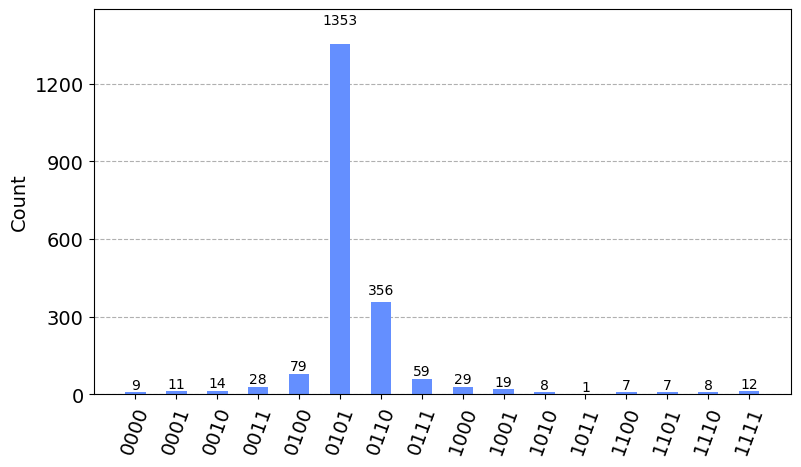

In [4]:
## Run this cell to simulate 'qpe4' and to plot the histogram of the result
sim = Aer.get_backend('aer_simulator')
shots = 2000
count_qpe4 = execute(qpe4, sim, shots=shots).result().get_counts()
plot_histogram(count_qpe4, figsize=(9,5))

In [5]:
from qc_grader.challenges.qgss_2023 import grade_lab3_ex1 

grade_lab3_ex1(count_qpe4)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Next write a function to process the bit strings into the estimate of $\theta$.  Recall that the phase estimate is written in the form:

$$ \theta = 0.\theta_1\theta_2\theta_3...\theta_t = \frac{\theta_1}{2^1} + \frac{\theta_2}{2^2} + \frac{\theta_3}{2^3} + ... + \frac{\theta_t}{2^t} $$

where $\theta_i = \{0,1\}$.  What is the estimated phase?  What is the highest power of 2 this circuit can be accurate up to given your choice of the number of counting qubits (e.g. $2^{-2}$, $2^{-3}$, $2^{-4}$, etc.)?



In [6]:
# process the result count data to determine accuracy of
# the estimated phase and grab the highest probability measurement


# define the maximum number of counts which will be obtained
max_binary_counts = 0

# define the maximum binary value which will be obtained
max_binary_val = ""


# for each count obtained from the quantum simulation of
# the Quantum Phase Estimation (QPE)
for key, item in count_qpe4.items():
    
    # if the current number of counts is greater than
    # the current maximum number of counts obtained
    if item > max_binary_counts:
        
        # update the maximum number of counts obtained
        max_binary_counts = item
        
        # update the maximum binary value obtained
        max_binary_val = key

        
#########################################
        

#### your function to convert a binary    ####
#### string to a decimal number goes here ####

# define the function to convert
# a binary string to a decimal number
def bin_to_decimal( binary_string ):
    
    # return a binary string
    # converted to a decimal number
    return int( binary_string, 2 )


# calculate the estimated phase obtained
# from the quantum simulation of
# the Quantum Phase Estimation (QPE)
estimated_phase = ( bin_to_decimal(max_binary_val) / 2**phase_register_size )

# calculate the phase accuracy
# which can be obtained from
# the quantum simulation of
# the Quantum Phase Estimation (QPE)
# with the quantum circuit defined before,
# inverse of the highest power of 2
# (i.e. smallest decimal) this quantum circuit can estimate
phase_accuracy_window = 2**( -phase_register_size )

In [7]:
print(estimated_phase, phase_accuracy_window)

0.3125 0.0625


In [8]:

from qc_grader.challenges.qgss_2023 import grade_lab3_ex2 

grade_lab3_ex2([estimated_phase, phase_accuracy_window])

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Step 2: Run on Noisy Hardware

Now run this circuit using your favorite backend!  Transpile this circuit a number of times (you pick how many) and pick the one with the lowest and highest circuit depth. 

Transpile the circuit with the parameter optimization_level = 3 to reduce the error in the result. Qiskit by default uses a stochastic swap mapper to place the needed SWAP gates, which varies the transpiled circuit results even under the same runtime settings. Therefore, to achieve shorter depth transpiled circuit for smaller error in the outcome, transpile qpe4 multiple times and choose one with the minimum circuit depth. Select the maximum circuit depth one as well to compare against, name them `min_depth_qpe` and `max_depth_qpe`.



In [9]:
from qiskit_ibm_provider import IBMProvider
from qiskit.compiler import transpile


provider = IBMProvider()
hub = "summer-school-1"
group = "group-8"
project = "6757964079"
backend_name = "ibmq_manila"

backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")

# your code goes here

# define the initial maximum quantum circuit depth obtained
max_depth = 1e-20

# define the initial minimum quantum circuit depth obtained
min_depth = 1e20


# define the number of trials to transpile/optimize
# the quantum circuit for the Quantum Phase Estimation (QPE) 
num_trials = 10


# for each trial to transpile/optimize the quantum circuit
# for the Quantum Phase Estimation (QPE) 
for _ in range(num_trials):
    
    # transpile/optimize the quantum circuit
    # for the Quantum Phase Estimation (QPE),
    # for the current considering trial
    transpiled_qpe4 = transpile( qpe4, backend, optimization_level=3 )
    
    # retrieve the quantum circuit depth of
    # the transpiled/optimized quantum circuit
    # for the Quantum Phase Estimation (QPE) 
    transpiled_qpe4_depth = transpiled_qpe4.depth()
    
    
    # if the quantum circuit depth of
    # the transpiled/optimized quantum circuit
    # for the Quantum Phase Estimation (QPE)
    # is greater than the current maximum
    # quantum circuit depth obtained 
    if transpiled_qpe4_depth > max_depth:
        
        # update the maximum quantum circuit depth
        # obtained with the current quantum circuit depth
        max_depth = transpiled_qpe4_depth
        
        # update the quantum circuit with the maximum depth
        # with the current quantum circuit transpiled/optimized
        max_depth_qpe = transpiled_qpe4
    
    
    # if the quantum circuit depth of
    # the transpiled/optimized quantum circuit
    # for the Quantum Phase Estimation (QPE)
    # is lower than the current minimum
    # quantum circuit depth obtained 
    if transpiled_qpe4_depth < min_depth:

        # update the minimum quantum circuit depth
        # obtained with the current quantum circuit depth
        min_depth = transpiled_qpe4_depth
        
        # update the quantum circuit with the minimum depth
        # with the current quantum circuit transpiled/optimized
        min_depth_qpe = transpiled_qpe4

        
##########################################

In [10]:
from qc_grader.challenges.qgss_2023 import grade_lab3_ex3

grade_lab3_ex3([max_depth_qpe, min_depth_qpe])

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [11]:
"""
shots = 2000

#OPTIONAL: Run the minimum depth qpe circuit
job_min_qpe4 = backend.run(min_depth_qpe, sim, shots=shots)
print(job_min_qpe4.job_id())

#Gather the count data
count_min_qpe4 = job_min_qpe4.result().get_counts()
plot_histogram(count_min_qpe4, figsize=(9,5))
"""

'\nshots = 2000\n\n#OPTIONAL: Run the minimum depth qpe circuit\njob_min_qpe4 = backend.run(min_depth_qpe, sim, shots=shots)\nprint(job_min_qpe4.job_id())\n\n#Gather the count data\ncount_min_qpe4 = job_min_qpe4.result().get_counts()\nplot_histogram(count_min_qpe4, figsize=(9,5))\n'

In [12]:
"""
#OPTIONAL: Run the maximum depth qpe circuit
job_max_qpe4 = backend.run(max_depth_qpe, sim, shots=shots)
print(job_max_qpe4.job_id())

#Gather the count data
count_max_qpe4 = job_max_qpe4.result().get_counts()
plot_histogram(count_max_qpe4, figsize=(9,5))
"""

'\n#OPTIONAL: Run the maximum depth qpe circuit\njob_max_qpe4 = backend.run(max_depth_qpe, sim, shots=shots)\nprint(job_max_qpe4.job_id())\n\n#Gather the count data\ncount_max_qpe4 = job_max_qpe4.result().get_counts()\nplot_histogram(count_max_qpe4, figsize=(9,5))\n'

## Step 3: Try with a different $\theta$

Now try the same procedure with $\theta = \frac{1}{7}$.  Rewrite your code written above to create a function which generates a QPE circuit with $n$ register qubits.  How many register qubits storing the phase information are needed for the estimate to be accurate to within $2^{-6}$? 

*Hint: It may be easier to iterate over different phase register sizes by creating a callable function. Perhaps call it* `qpe_circuit`

In [13]:
# define the function to perform the Quantum Hadamard Transform on
# the n qubits of the quantum register of the quantum circuit
# implementing the Quantum Phase Estimation (QPE)
def apply_quantum_hadamard_transform( circuit, n ):
    
    # for each qubit of the quantum register of the quantum circuit
    # implementing the Quantum Phase Estimation (QPE) for n qubits
    for qubit_idx in range(n):
        
        # apply the Hadamard gate to the current ith qubit
        circuit.h(qubit_idx)
        

# define the function to perform the Controlled-Phase gates on
# the n qubits of the quantum register of the quantum circuit
# implementing the Quantum Phase Estimation (QPE),
# as part of the Quantum Fourier Transform (QFT)
def apply_controlled_phases( theta, circuit, n ):
    
    # for each ith step according to
    # the number of n qubits used
    for step in range(n):
    
        # compute the iteration parameter t
        # as a power of 2, according to the current step
        t = 2**step

        
        # for each iteration according to
        # the iteration parameter t
        for _ in range(t):

            # apply the Controlled-Phase gate for the theta angle,
            # with control on the ith qubit and target on the last qubit
            circuit.cp( theta, step, n )  

            
# define the function to perform the Swap gates on
# the n qubits of the quantum register of the quantum circuit
# implementing the Quantum Phase Estimation (QPE),
# as part of the Quantum Fourier Transform (QFT)
def apply_swaps( circuit, n ):
    
    # for a number of iterations equal to half of
    # the number of phase counting qubits used
    # on the resepective quantum circuit
    # for the Quantum Fourier Transform (QFT)
    for qubit_idx in range( phase_register_size // 2 ):
        
        # apply the Swap gate between the kth qubit and
        # the (n - k)th qubit on the quantum register defined before
        circuit.swap( qubit_idx, ( n - qubit_idx - 1 ) )
        

# define the function to perform
# the Inverse Quantum Fourier Transform (IQFT) on
# the n qubits of the quantum register of the quantum circuit
# implementing the Quantum Phase Estimation (QPE)
def apply_quantum_fourier_transform_inverse( circuit, n ):
    
    # for each jth qubit on the quantum register
    for j in range(n):
        
        # for each additional mth qubit ranging to
        # the current jth qubit being iterated before
        for m in range(j):
            
            # apply the Controlled-Phase gate for
            # the theta angle equal to -pi / ( 2^( j - m ) ),
            # with control on the mth qubit and target on the jth qubit
            circuit.cp( -np.pi / float( 2**( j - m ) ), m, j )

        
        # apply the Hadamard gate to the jth qubit
        circuit.h(j)


# define the function to perform a measurement of
# all the n qubits on the quantum register of a quantum circuit,
# and storing the classical outcomes on the n bits of
# the classical register of that same quantum circuit
def measure_all_qubits( circuit, n ):
    
    # for each pair of qubits and bits
    for j in range(n):    
        
        # measure the current qubit on the quantum register,
        # and stores the classical outcome obtained
        # in the current bit on the classical register
        circuit.measure(j, j)


# define the function to create a quantum circuit,
# implementing the Quantum Phase Estimation (QPE) on (n + 1) qubits
def qpe_circuit(register_size):
    
    #########################################
    
    #### your code goes here ####
    
    
    # define the theta phase angle to estimate
    theta = 1/7
    
    # create the quantum circuit with a quantum register with (n + 1) qubits
    # and a classical register with n bits, intended to implement
    # the Quantum Phase Estimation (QPE) on n qubits
    qpe = QuantumCircuit( ( register_size + 1 ), register_size )
    
    
    # perform the Quantum Hadamard Transform on
    # the n qubits of the quantum register of
    # the quantum circuit implementing
    # the Quantum Phase Estimation (QPE)
    apply_quantum_hadamard_transform( qpe, register_size )
    
    # apply the Pauli-X gate to the last qubit on
    # the quantum register of the quantum circuit of
    # the Quantum Phase Estimation (QPE)
    qpe.x(register_size)
    
    # apply a barrier to the quantum circuit of
    # the Quantum Phase Estimation (QPE)
    qpe.barrier()
    
    
    # perform the Controlled-Phase gates on
    # the n qubits of the quantum register of the quantum circuit
    # implementing the Quantum Phase Estimation (QPE),
    # as part of the Quantum Fourier Transform (QFT)
    apply_controlled_phases( theta, qpe, register_size )
    
    # apply a barrier to the quantum circuit of
    # the Quantum Phase Estimation (QPE)
    qpe.barrier()
    
    # perform the Swap gates on the n qubits of
    # the quantum register of the quantum circuit
    # implementing the Quantum Phase Estimation (QPE),
    # as part of the Quantum Fourier Transform (QFT)
    apply_swaps( qpe, register_size )
    
    # apply a barrier to the quantum circuit of
    # the Quantum Phase Estimation (QPE)
    qpe.barrier()
    
    
    # perform the Inverse Quantum Fourier Transform (IQFT) on
    # the n qubits of the quantum register of the quantum circuit
    # implementing the Quantum Phase Estimation (QPE)
    apply_quantum_fourier_transform_inverse( qpe, register_size )
    
    # apply a barrier to the quantum circuit of
    # the Quantum Phase Estimation (QPE)
    qpe.barrier()
    
    
    # perform a measurement of all the n qubits on
    # the quantum register of the quantum circuit of
    # the Quantum Phase Estimation (QPE) and storing
    # the classical outcomes on the n bits of
    # the classical register of that same quantum circuit
    measure_all_qubits( qpe, register_size )
    
    
    # return the quantum circuit, implementing
    # the Quantum Phase Estimation (QPE) on n qubits
    return qpe
    
    #########################################

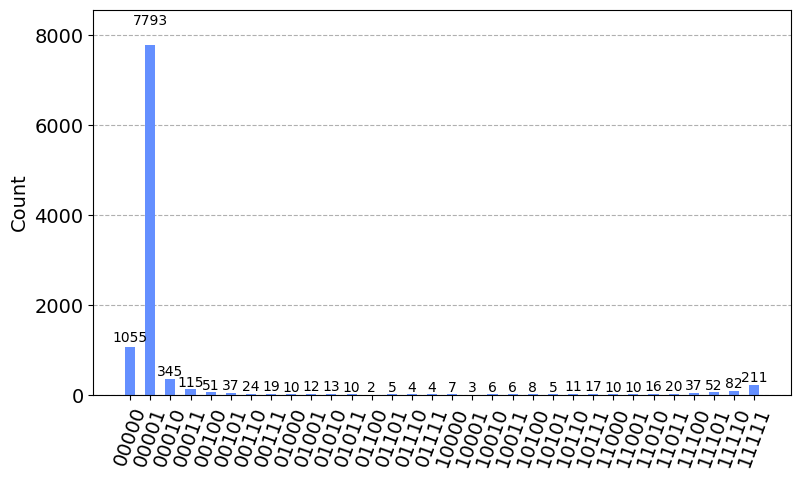

In [14]:
# run this cell to simulate 'qpe' and
# to plot the histogram of the result

# define several quantum register sizes
# equal to n, allowing to vary them
#reg_size = 4
reg_size = 5
#reg_size = 6
#reg_size = 7
#reg_size = 8

# create a quantum circuit for
# the Quantum Phase Estimation (QPE),
# given the quantum register defined before,
# with n counting qubits
qpe_check = qpe_circuit( reg_size )


# create the Aer Simulator object
sim = Aer.get_backend("aer_simulator")

# define the number of shots
shots = 10000


# execute the simulation for the Quantum Phase Estimation (QPE),
# with n counting qubits, and retrieve its result counts
count_qpe = execute( qpe_check, sim, shots=shots ).result().get_counts()

# plot the histogram of the result counts of the quantum simulation
# for the Quantum Phase Estimation (QPE), with n counting qubits
plot_histogram( count_qpe, figsize=(9,5) )

In [15]:
# process the result count data to determine accuracy of
# the estimated phase and grab the highest probability measurement


# define the maximum number of counts which will be obtained
max_binary_counts = 0

# define the maximum binary value which will be obtained
max_binary_val = ""


# for each count obtained from the quantum simulation of
# the Quantum Phase Estimation (QPE)
for key, item in count_qpe.items():
    
    # if the current number of counts is greater than
    # the current maximum number of counts obtained
    if item > max_binary_counts:
                
        # update the maximum number of counts obtained
        max_binary_counts = item
        
        # update the maximum binary value obtained
        max_binary_val = key

        
#########################################
        

#### your function to convert a binary    ####
#### string to a decimal number goes here ####

# define the function to convert
# a binary string to a decimal number
def bin_to_decimal( binary_string ):
    
    # return a binary string
    # converted to a decimal number
    return int( binary_string, 2 )


# calculate the estimated phase obtained
# from the quantum simulation of
# the Quantum Phase Estimation (QPE)
estimated_phase = ( bin_to_decimal(max_binary_val) / 2**reg_size )

# print the estimated phase obtained
# from the quantum simulation of
# the Quantum Phase Estimation (QPE)
print("Estimated Phase:", estimated_phase)


# calculate the phase accuracy
# which can be obtained from
# the quantum simulation of
# the Quantum Phase Estimation (QPE)
# with the quantum circuit defined before,
# inverse of the highest power of 2
# (i.e. smallest decimal) this quantum circuit can estimate
phase_accuracy_window = 2**( -reg_size )

# print the phase accuracy
# which can be obtained from
# the quantum simulation of
# the Quantum Phase Estimation (QPE)
# with the quantum circuit defined before,
# inverse of the highest power of 2
# (i.e. smallest decimal) this quantum circuit can estimate
print("Phase Accuracy Window:", phase_accuracy_window)


# define the theta phase angle,
# which was pretended to be estimated
theta = 1 / 7

# compute the accuracy of the estimated phase,
# as the distance between the estimated phase 
# and the theta phase angle, which was pretended to be estimated
accuracy_estimated_phase = abs( theta - estimated_phase )

# print the accuracy of the estimated phase,
# as the distance between the estimated phase 
# and the theta phase angle, which was pretended to be estimated
print("Accuracy of the Estimated Phase:", accuracy_estimated_phase)

Estimated Phase: 0.03125
Phase Accuracy Window: 0.03125
Accuracy of the Estimated Phase: 0.11160714285714285


In [16]:
### put your answer here ###

# to estimate accurately the phase information to be within 2^(-6)
# we need n + 1 = 6 (=) n = 5 qubits to store the phase information
required_register_size = 5

In [17]:
### submit your answer ###

# import the grader for the exercise 4 of the lab 3
from qc_grader.challenges.qgss_2023 import grade_lab3_ex4

# grade the exercise 4 of the lab 3
grade_lab3_ex4( required_register_size )

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Section 2: Shor's Algorithm
***

Here we will construct a set of functions to implement Shor's algorithm.  Remember that the goal of this algorithm is to find the prime factors of some large number $N$ and the key speedup this algorithm provides is by executing the period-finding part using a quantum computer.  This is where this section of the lab will focus.


Shor's algorithm is composed of the following steps:
1. Choose a co-prime $a$, where $a\in [2,N-1]$ and the greatest common divisor of $a$ and $N$ is 1.
1. Find the order (periodicity) of $a$ modulo $N$, i.e. the smallest integer $r$ such that $a^r\text{mod} N=1$
1. Obtain the factor of $N$ by computing the greatest common divisor of $a^{r/2} \pm 1$ and $N$.

## Step 1. Period Finding

To begin, we'll use the unitary operator: $$ U|y\rangle{} \equiv |ay\ \text{mod} N\rangle{} $$


and explore the superposition state: 
$$
|u\rangle{} = \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1} e^{-\frac{2\pi ik}{r}}|a^k \text{mod}N\rangle{}
$$

Let's pick $a=3$ and $N=35$ as an example and investigate what the action of $U$ is on $|u\rangle{}$
\begin{align}
    U|u\rangle{} &= U\frac{1}{\sqrt{r}}\left( |1\rangle{} + e^{-\frac{2\pi i}{r}}|3\rangle{} + e^{\frac{-4\pi i}{r}}|9\rangle{} + ... + e^{\frac{-20\pi i}{r}}|4\rangle{} + e^{\frac{-22\pi i}{r}}|12\rangle{} \right) \\
    & =\frac{1}{\sqrt{r}}\left( U|1\rangle{} + e^{-\frac{2\pi i}{r}}U|3\rangle{} + e^{\frac{-4\pi i}{r}}U|9\rangle{} + ... + e^{\frac{-20\pi i}{r}}U|4\rangle{} + e^{\frac{-22\pi i}{r}}U|12\rangle{} \right) \\
    &= \frac{1}{\sqrt{r}}\left( |3\rangle{} + e^{-\frac{2\pi i}{r}}|9\rangle{} + e^{\frac{-4\pi i}{r}}|27\rangle{} + ... + e^{\frac{-20\pi i}{r}}|12\rangle{} + e^{\frac{-22\pi i}{r}}|1\rangle{} \right) \\
    &= \frac{e^{\frac{2\pi i}{r}}}{\sqrt{r}}\left( e^{-\frac{2\pi i}{r}}|3\rangle{} + e^{\frac{-4\pi i}{r}}|9\rangle{} + ... + e^{\frac{-20\pi i}{r}}|4\rangle{} + e^{\frac{-22\pi i}{r}}|12\rangle{} + |1\rangle{} \right) \\
    &= \frac{e^{\frac{2\pi i}{r}}}{\sqrt{r}} |u\rangle{}.
\end{align}


This is a particularly helpful eigenvalue as it contains $r$.  In fact, it needs to be included in order to ensure the phase differences between the basis states are equal.  This is also not the only eigenstate of $U$.  For us to generalize further, we can multiply an integer $s$ to each of these phases, which will then show up in our eigenvalue

\begin{align}
    |u_s\rangle{} &= \frac{1}{\sqrt{r}}\sum_{k=0}^{r-1} e^{\frac{-2\pi isk}{r}|a^k\text{mod} N\rangle{}} \\
    U|u_s\rangle{} &= e^{\frac{2\pi is}{r}}|u_s\rangle{}.
\end{align}


Now we have an eigenstate for each integer $0 \leq s \leq r$.  Notably, if we add up all of these eigenstates, the phases cancel all other basis states except $|1\rangle{}$ $$ \frac{1}{\sqrt{r}} \sum_{s=0}^{r-1}|u_s\rangle{} = |1\rangle{} $$.


Since any state in the computational basis can be written as a linear combination of these eigenstates, if we do QPE on $U$ using the state $|1\rangle{}$, we will measure a phase 

$$ \phi = \frac{s}{r} $$
where $s$ is a random integer between $0$ and $r-1$.  Finally, we can use a method called the continued fraction algorithm on $\phi$ in order to find r.  The final circuit will look something like this



<img src="./resources/Shor_circuit.png" alt="Short Circuit" style="width: 1000px;"/>


***

Below we'll provide the unitary $U$ needed for solving this period finding problem with $a=7$ and $N=15$

$$ 
    U|y\rangle{} = |7y\text{mod}15\rangle{}.
$$

To create $U^x$ we will simply repeat the circuit $x$ times.  The cell below will construct this unitary

In [18]:
# create 7 mod 15 unitary operator
# for a quantum circuit
N = 15

# define the number of m qubits required
# for the 7 mod 15 operator to be executed
m = int( np.ceil( np.log2( N ) ) )

# create the quantum circuit with
# a quantum register of m qubits
# to implement the 7 mod 15 unitary operator
U_qc = QuantumCircuit( m )


# apply the Pauli-X gate to all the m qubits of
# the quantum register of the quantum circuit
# implementing the 7 mod 15 unitary operator
U_qc.x( range(m) )


# apply the Swap gate between the 2nd qubit and
# the 3rd qubit on the quantum register of
# the quantum circuit implementing
# the 7 mod 15 unitary operator
U_qc.swap(1, 2)

# apply the Swap gate between the 3rd qubit and
# the 4th qubit on the quantum register of
# the quantum circuit implementing
# the 7 mod 15 unitary operator
U_qc.swap(2, 3)

# apply the Swap gate between the 1st qubit and
# the 4th qubit on the quantum register of
# the quantum circuit implementing
# the 7 mod 15 unitary operator
U_qc.swap(0, 3)


# convert the quantum circuit implementing
# the 7 mod 15 unitary operator to
# a quantum unitary gate 
U = U_qc.to_gate()


# define the name of the 7 mod 15
# unitary operator created before
U.name ="{}Mod{}".format(7, N)

Confirm if the operator $U$ works as intended by creating a quantum circuit with $m=4$ qubits.  Prepare the inpute state $|y\rangle{}$ representing any integer between $0$ and $15$ (remembering that Qiskit uses little endian notation) such as $|1\rangle{} = |0001\rangle{}$, $|5\rangle{} = |0101\rangle{}$, etc. and apply $U|y\rangle{}$.  Check if the circuit produces the expected outcomes for several inputs: $|1\rangle{}$, $|2\rangle{}$, and $|5\rangle{}$. (For example, the outcome for input state $|2\rangle{}$ should be $|14\rangle{}=|1110\rangle{}$)  

Run these circuits through the `aer_simulator` backend with $20000$ shots, save the count data as `input_1`, `input_3`, and `input_5`.

In [19]:
# your code goes here

# print the number of qubits
print("Num. qubits: m =", m);



# define the quantum circuits for the inputs
# |1> = |0001>, |2> = |0010>, and |5> = |0101>


#########################################


# create the a quantum circuit with m qubits,
# for the input state |1> = |0001>
qcirc_input_1 = QuantumCircuit(m)

# apply the Pauli-X gate to
# the 1st qubit of the quantum register of
# the quantum circuit defined before
qcirc_input_1.x(0)

# apply the U gate to all
# the m qubits of the quantum register of
# the quantum circuit defined before
qcirc_input_1.append( U, range(m) )

# measure all the m qubits of
# the quantum register of
# the quantum circuit defined before
qcirc_input_1.measure_all()


#########################################


# create the a quantum circuit with m qubits,
# for input state |2> = |0010>
qcirc_input_2 = QuantumCircuit(m)

# apply the Pauli-X gate to
# the 2nd qubit of the quantum register of
# the quantum circuit defined before
qcirc_input_2.x(1)

# apply the U gate to all
# the m qubits of the quantum register of
# the quantum circuit defined before
qcirc_input_2.append( U, range(m) )

# measure all the m qubits of
# the quantum register of
# the quantum circuit defined before
qcirc_input_2.measure_all()


#########################################


# create the a quantum circuit with m qubits,
# for input state |5> = |0101>
qcirc_input_5 = QuantumCircuit(m)

# apply the Pauli-X gate to
# the 1st qubit of the quantum register of
# the quantum circuit defined before
qcirc_input_5.x(0)

# apply the Pauli-X gate to
# the 3rd qubit of the quantum register of
# the quantum circuit defined before
qcirc_input_5.x(2)

# apply the U gate to all
# the m qubits of the quantum register of
# the quantum circuit defined before
qcirc_input_5.append( U, range(m) )

# measure all the m qubits of
# the quantum register of
# the quantum circuit defined before
qcirc_input_5.measure_all()


#########################################

Num. qubits: m = 4


In [20]:
# run this cell to simulate 'qcirc' and to plot the histogram of the result

# create the Aer Simulator object
sim = Aer.get_backend("aer_simulator")

# define the number of shots
shots = 20000

# save the count data for the input state |1> = |0001>
input_1 = execute(qcirc_input_1, sim, shots=shots).result().get_counts()

# save the count data for the input state |2> = |0010>
input_2 = execute(qcirc_input_2, sim, shots=shots).result().get_counts()

# save the count data for the input state |5> = |0101>
input_5 = execute(qcirc_input_5, sim, shots=shots).result().get_counts()

In [21]:
# submit your answer

# import the grader for the exercise 5 of the lab 3
from qc_grader.challenges.qgss_2023 import grade_lab3_ex5

# grade the exercise 5 of the lab 3
grade_lab3_ex5( [ input_1, input_2, input_5 ] )

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Step 2. Implementing $U^{2^{m-1}}$

Now we'll use this controlled-$U$ to estimate the phase $\phi=\frac{s}{r}$.  But first, a quick point to note here.  It turns out a sequence of `7Mod15` gates produce the identity when executed by a multiple of 4 times.  To test this, create a quantum circuit implementing the `7mod15` gate $2^2$ times and run it on the `unitary_simulator` backend to obtain the matrix represenation of the gates in the circuit.  Verify $U^{2^2}=I$.

In [22]:
# create an unitary quantum circuit
# with a quantum register of m qubits
unitary_circ = QuantumCircuit(m)


#### your code goes here ####

# for each iteration in a range of 2^2 = 4
for _ in range( 2**2 ):
    
    # apply the U gate on all
    # the m qubits on the quantum register
    unitary_circ.append( U, range(m) )

In [23]:
# create a Unitary Simulator object
sim = Aer.get_backend("unitary_simulator")

# execute the quantum simulation of
# an unitary quantum circuit with
# a quantum register of m qubits,
# defined before, retrieving its unitary operator
unitary = execute( unitary_circ, sim ).result().get_unitary()

In [24]:
# submit your answer

# import the grader for the exercise 6 of the lab 3
from qc_grader.challenges.qgss_2023 import grade_lab3_ex6

# grade the exercise 6 of the lab 3
grade_lab3_ex6( unitary, unitary_circ )

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Step 3. Finding $\phi$ and Continued Fractions


Now armed with a way to execute $U^{2^{m-1}}$, let's use it in the QPE circuit you created earlier.  Below is a function to construct a controlled-$U$ gate. Use $8$ qubits for the phase register and 4 qubits for the register which $U$ will act on, using the `aer_simulator` again, estimate the phase $\phi$ given an input state of $|1\rangle{}$.

*Hint: at each step in the QPE circuit, you'll need to construct a new `cU_multi` circuit and append it to the QPE circuit. There will be several estimates that have approximately equal probability.*

In [25]:
# define the function to built a 2^k-Controlled-U gate object,
# which repeats the action of the operator U, 2^k times
def cU_multi(k):
    
    # define the size n of the system's quantum register
    sys_register_size = 4
    
    # create the quantum circuit with n qubits on
    # the system's quantum register, to build
    # a 2^k-Controlled-U gate object
    circ = QuantumCircuit( sys_register_size )
    
    
    # for each iteration ranging until 2^k
    for _ in range(2**k):
        
        # apply the U gate to all the n qubits on
        # the system's quantum register of
        # the quantum circuit to represent
        # the 2^k-Controlled-U gate
        circ.append(U, range(sys_register_size))
    
    
    # convert the operator resulting from the construction of
    # the quantum circuit defined before, to a quantum gate
    U_multi = circ.to_gate()
    
    
    # define the name of the 2^k-Controlled-U gate,
    # as being a "7 Mod 15 gate"
    U_multi.name = "7Mod15_[2^{}]".format(k)
    
    # set this 2^k-Controlled-U gate as multi-qubit gate,
    # depending on a given control qubit
    cU_multi = U_multi.control()
    
    
    # return the 2^k-Controlled-U gate object,
    # which repeats the action of the operator U, 2^k times
    return cU_multi

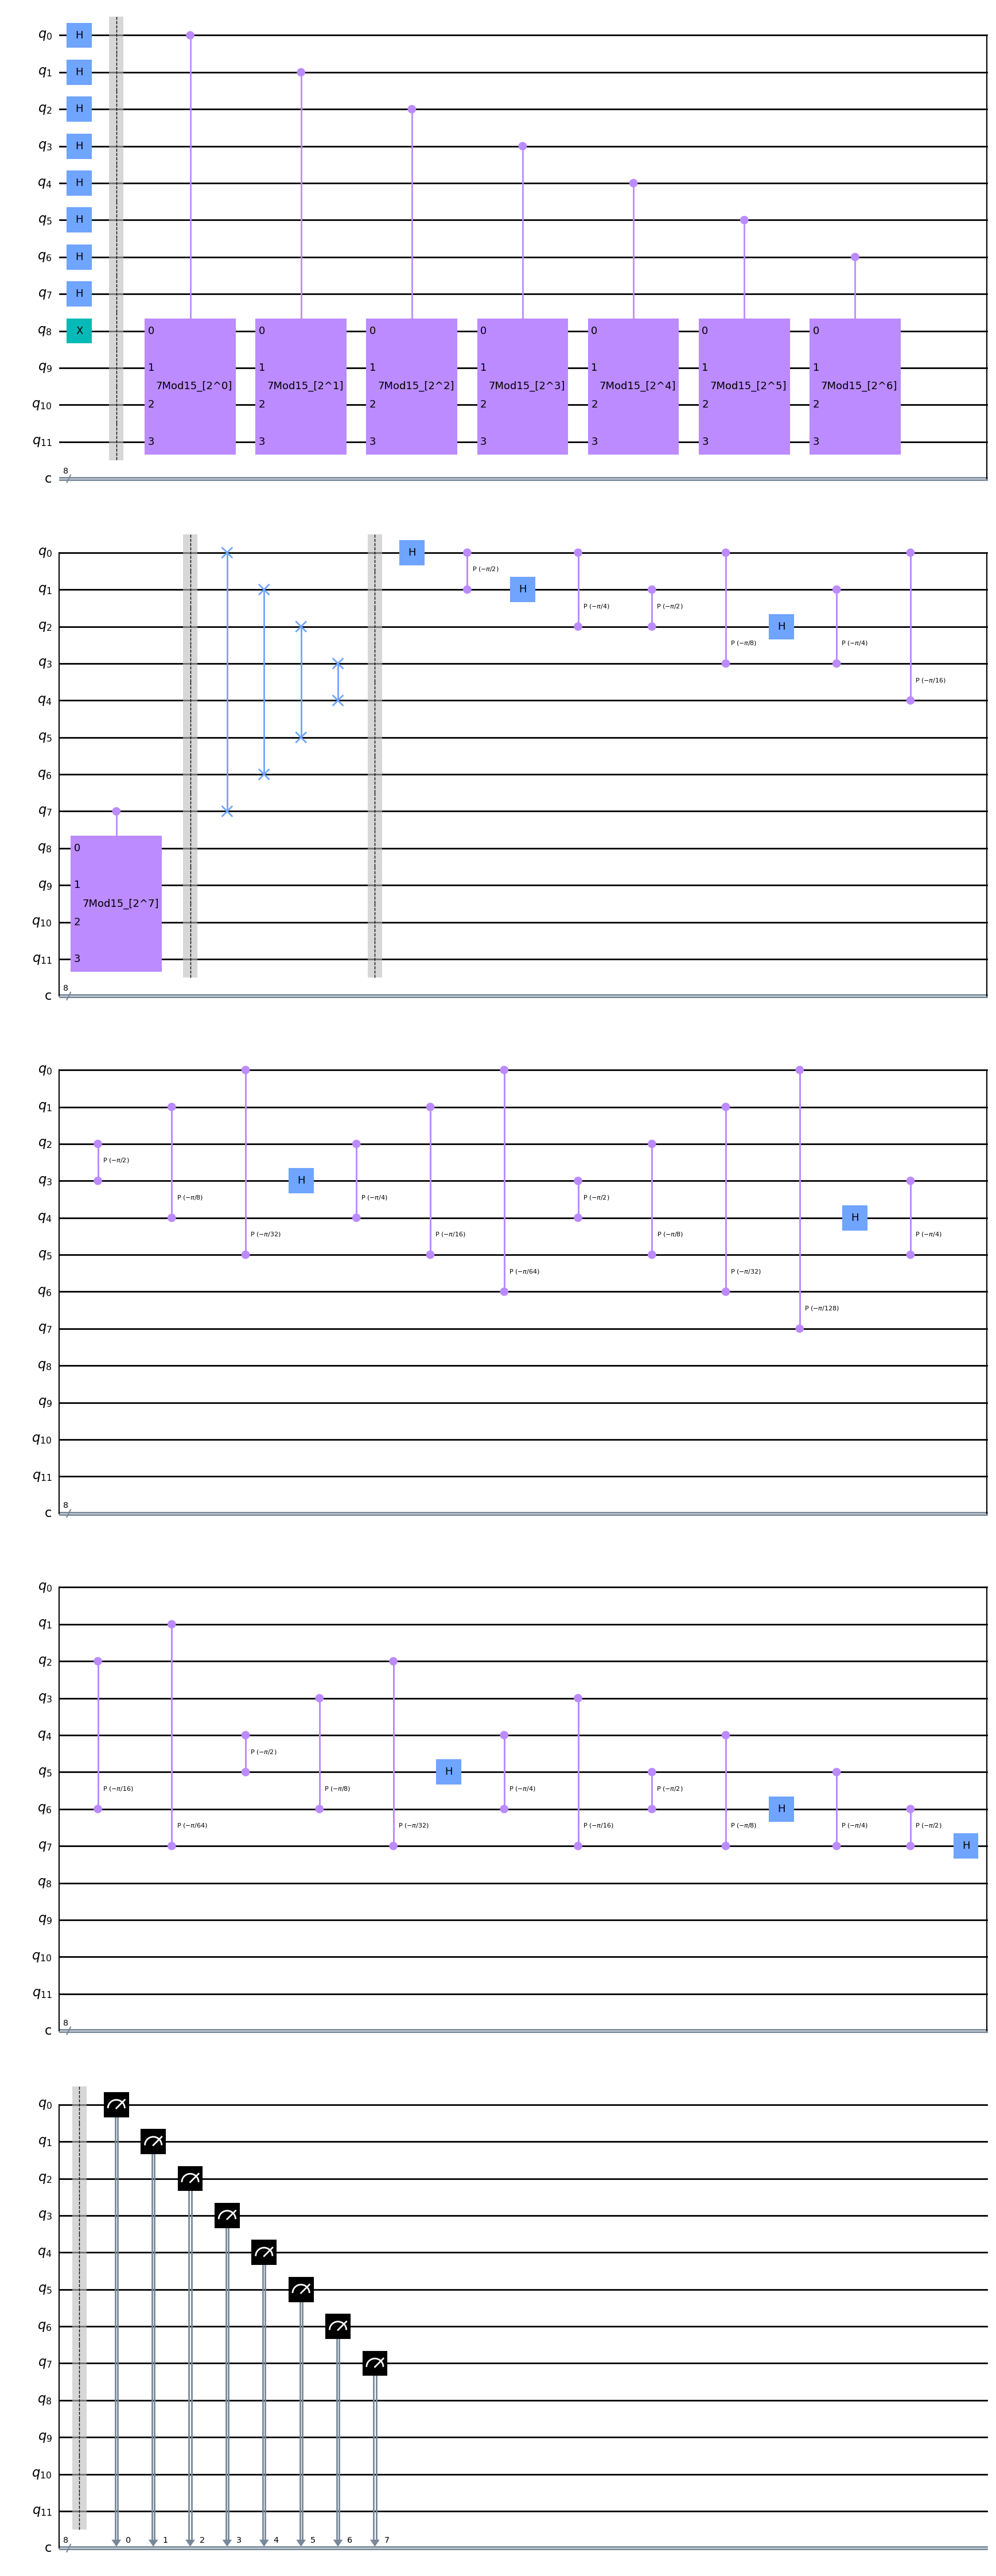

In [26]:
# define the size m of the quantum register
# for the phase counting of the qubits
phase_register_size = 8

# define the size n of the quantum register
# for the successive applications of
# the 2^k-Controlled-U gate defined before
cu_register_size = 4


# create the Quantum Circuit needed to run
# with m = 8 qubits for the phase counting
# and with n = 4 qubits for the successive
# applications of the 2^k-Controlled-U gate
# defined before, to implement the Shor's Algorithm
# for Factoring, based on Quantum Phase Estimation (QPE)
shor_qpe = QuantumCircuit( ( phase_register_size + cu_register_size ),
                             phase_register_size )


# perform the Quantum Hadamard Transform on
# the m qubits for the phase counting of
# the quantum register of the quantum circuit
# implementing the Shor's Algorithm for Factoring,
# based on Quantum Phase Estimation (QPE)
apply_quantum_hadamard_transform( shor_qpe, phase_register_size )

# apply the Pauli-X gate to the last qubit on
# the quantum register of the quantum circuit to
# implement the Shor's Algorithm for Factoring,
# based on Quantum Phase Estimation (QPE)
shor_qpe.x( phase_register_size )

# apply a barrier to the quantum circuit to
# implement the Shor's Algorithm for Factoring,
# based on Quantum Phase Estimation (QPE)
shor_qpe.barrier()


# for each kth qubit on the quantum register 
# for the phase counting of the qubits
for k in range( phase_register_size ):
    
    # retrieve the 2^k-Controlled-U gate object,
    # which repeats the action of the operator U,
    # 2^k times, defined before
    cU = cU_multi(k)
    
    # apply the 2^k-Controlled-U gate object,
    # which repeats the action of the operator U,
    # 2^k times, defined before, for the kth iteration,
    # to the quantum circuit to implement
    # the Shor's Algorithm for Factoring,
    # based on Quantum Phase Estimation (QPE)
    shor_qpe.append( cU, [k] + list( range( phase_register_size,
                                            ( phase_register_size + cu_register_size ) ) ) )


# apply a barrier to the quantum circuit to
# implement the Shor's Algorithm for Factoring,
# based on Quantum Phase Estimation (QPE)   
shor_qpe.barrier()

# perform the Swap gates on the n qubits of
# the quantum register of the quantum circuit
# implementing the Quantum Phase Estimation (QPE),
# as part of the Quantum Fourier Transform (QFT),
# required to build the quantum circuit to implement
# the Shor's Algorithm for Factoring,
# based on Quantum Phase Estimation (QPE) 
apply_swaps(shor_qpe, phase_register_size)

# apply a barrier to the quantum circuit to
# implement the Shor's Algorithm for Factoring,
# based on Quantum Phase Estimation (QPE)
shor_qpe.barrier()


# perform the Inverse Quantum Fourier Transform (IQFT) on
# the m qubits for the phase counting of
# the quantum register of the quantum circuit
# implementing the Shor's Algorithm for Factoring,
# based on Quantum Phase Estimation (QPE)
apply_quantum_fourier_transform_inverse( shor_qpe, phase_register_size )


# apply a barrier to the quantum circuit to
# implement the Shor's Algorithm for Factoring,
# based on Quantum Phase Estimation (QPE)
shor_qpe.barrier()


# perform a measurement of all
# the m qubits for the phase counting of
# the quantum register of the quantum circuit
# implementing the Shor's Algorithm for Factoring,
# based on Quantum Phase Estimation (QPE)
shor_qpe.measure( range( phase_register_size ),
                  range( phase_register_size ) )


# draw the quantum circuit implementing
# the quantum circuit to
# implement the Shor's Algorithm for Factoring,
# based on Quantum Phase Estimation (QPE)
shor_qpe.draw("mpl")

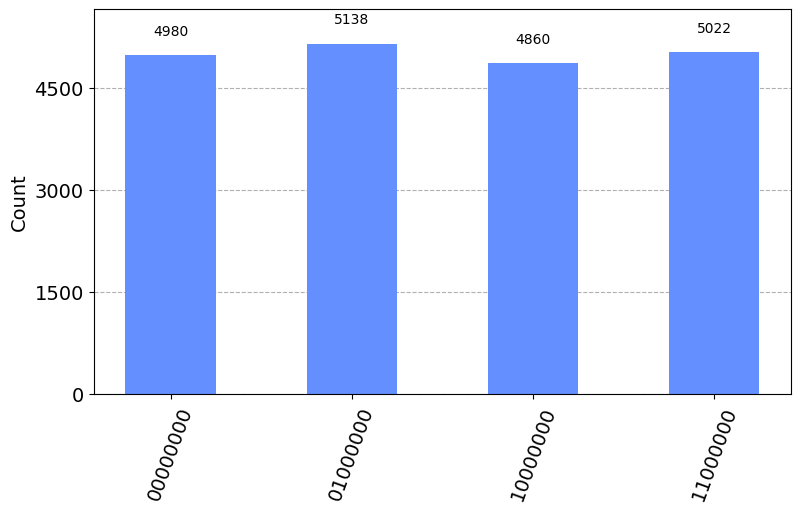

In [27]:
# run this cell to simulate 'shor_qpe' and
# to plot the histogram of the results


# create an Aer Simulator object
sim = Aer.get_backend("aer_simulator")

# define the number of shots
shots = 20000


# execute the quantum simulation for
# the quantum circuit for the Shor's Algorithm,
# based on Quantum Phase Estimation (QPE),
# with n phase counting qubits, and retrieve
# the result counts of this quantum simulation
shor_qpe_counts = execute(shor_qpe, sim, shots=shots).result().get_counts()

# plot the histogram of the result counts of the quantum simulation
# for the quantum circuit for the Shor's Algorithm, based on
# Quantum Phase Estimation (QPE), with n phase counting qubits
plot_histogram( shor_qpe_counts, figsize=(9,5) )

In [28]:
# submit your answer

# import the grader for the exercise 7 of the lab 3
from qc_grader.challenges.qgss_2023 import grade_lab3_ex7

# grade the exercise 7 of the lab 3
grade_lab3_ex7( shor_qpe_counts )

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


We can then find the integers $s$ and $r$ using the continued fractions algorithm.  Luckily python has built-in functionality for this using the `Fraction` function, where we will limit the denominator to $r<15$.  Use this to find the estimated $s$ and $r$ for each outcome you measured above.

In [29]:
# import the Fraction object
# from the built-in fractions module
from fractions import Fraction


# print the number '0.666',
# as an unlimited Fraction object
print( "Unlimited Fraction(0.666):",
       Fraction(0.666), '\n')

# print the number '0.666',
# as a limited Fraction object
# with the denominator of 15
print( "Limited Fraction(0.666), with a max. denominator of 15:",
       Fraction(0.666).limit_denominator(15) )

Unlimited Fraction(0.666): 5998794703657501/9007199254740992 

Limited Fraction(0.666), with a max. denominator of 15: 2/3


In [30]:
# create a list with the estimated phases of the result counts
# obtained from the execution of the quantum simulation
# for the Quantum Phase Estimation (QPE), with n counting qubits
estimated_phases = [ bin_to_decimal(binary_val) / 2**phase_register_size
                     for binary_val in shor_qpe_counts ]

# print the list with the estimated phases of the result counts
# obtained from the execution of the quantum simulation
# for the Quantum Phase Estimation (QPE), with n counting qubits
print( "Estimated Phases:", estimated_phases )


# create a list of with the estimated phases of the result counts
# obtained from the execution of the quantum simulation
# for the Quantum Phase Estimation (QPE), with n counting qubits,
# represented as Fraction objects with the format s/r
shor_qpe_fractions = [ Fraction(estimated_phase).limit_denominator(15)
                       for estimated_phase in estimated_phases ]

# print the list of with the estimated phases of the result counts
# obtained from the execution of the quantum simulation
# for the Quantum Phase Estimation (QPE), with n counting qubits,
# represented as Fraction objects with the format s/r
print( "Estimated Fractions:", shor_qpe_fractions )

Estimated Phases: [0.5, 0.25, 0.0, 0.75]
Estimated Fractions: [Fraction(1, 2), Fraction(1, 4), Fraction(0, 1), Fraction(3, 4)]


In [31]:
from qc_grader.challenges.qgss_2023 import grade_lab3_ex8

grade_lab3_ex8(shor_qpe_fractions)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Step 4. Putting it all together

Now let's put all of these steps together in order to factor the (very simple) number,  $N = 15$.  We'll continue with our example of $a=7$, remember that the phase we measure $s/r$ where $s$ is a random integer between $0$ and $r-1$ and:

$$
    a^r\text{mod}N = 1
$$

Then, once we have $r$, we can find a factor of $N$ by:

$$
    \left(a^r-1\right)\text{mod} N = 0
$$
which requires that $N$ must divide by $a^r-1$.  If $r$ is even, we can also write

$$
    a^r-1 = \left(a^{r/2}+1\right)\left(a^{r/2}-1\right).
$$

Put together a function called `shor_qpe` which takes an argument for $k$ (the number of counting qubits) and composes, runs, and processes Shor's algorithm to guess the factors.  Use an input state of $|y\rangle{}=|1\rangle{}$ for the phase estimation. (Note: The function `cU_multi()` only executes $|ay\ \text{mod}\ 15\rangle{}$ for $a=7$)

In [32]:
 # !pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git@main

In [33]:
# define the function to create and execute
# the Shor's Algorithm for Factoring,
# based on Quantum Phase Estimation (QPE),
# with k phase counting qubits
def shor_qpe(k):

    # define the co-prime a
    a = 7
    
    # define the number N to factor
    N = 15
    
    # compute the number m of
    # additional qubits required
    m = int( np.ceil( np.log2(N) ) )
        
        
    #################################################
    
    # step 1. Begin a while loop until a nontrivial guess is found
    #### your code goes here ####
    
    # define the boolean flag to determine
    # if a non trivial guess was found, initially as False
    non_trivial_guess_found = False
    
    
    # while no trivial factor guess was found,
    # execute the while loop
    while( not non_trivial_guess_found ):
        
        
        #################################################

        # step 2a. construct a QPE quantum circuit
        #          with m phase counting qubits to guess
        #          the phase phi = s/r, using the function
        #          cU_multi() defined before
        
        
        #### your code goes here ####
        
        # create a quantum circuit for
        # the Shor's Algorithm for Factoring,
        # based on Quantum Phase Estimation (QPE),
        # with k phase counting qubits,
        # and additional m qubits for
        # the successive applications of
        # the 2^k-Controlled-U gate defined before
        qc = QuantumCircuit( ( k + m ), k)
        
        
        # perform the Quantum Hadamard Transform on
        # the k phase counting qubits of the respective
        # quantum register of the quantum circuit
        # for the Shor's Algorithm for Factoring,
        # based on Quantum Phase Estimation (QPE)
        apply_quantum_hadamard_transform( qc, k )
        
        # apply a Pauli-X gate to the last
        # phase counting qubit of the respective
        # quantum register of the quantum circuit
        # for the Shor's Algorithm for Factoring,
        # based on Quantum Phase Estimation (QPE)
        qc.x(k)

        # apply a barrier to the quantum circuit for
        # the Shor's Algorithm for Factoring,
        # based on Quantum Phase Estimation (QPE),
        # with k phase counting qubits,
        # and additional m qubits for
        # the successive applications of
        # the 2^k-Controlled-U gate defined before
        qc.barrier()
        
        
        # for each kth qubit on the quantum register 
        # for the phase counting of the qubits
        for k_i in range(k):

            # retrieve the 2^k-Controlled-U gate object,
            # which repeats the action of the operator U,
            # 2^k times, defined before
            cU = cU_multi(k_i)
            
            # apply the 2^k-Controlled-U gate object,
            # which repeats the action of the operator U,
            # 2^k times, defined before, for the kth iteration,
            # to the quantum circuit for the Shor's Algorithm
            # for Factoring, based on Quantum Phase Estimation (QPE),
            # with k phase counting qubits, and additional m qubits
            # for the successive applications of
            # the 2^k-Controlled-U gate defined before
            qc.append( cU, [k_i] + list( range( k, ( k + m ) ) ) )

        
        # apply a barrier to the quantum circuit for
        # the Shor's Algorithm for Factoring,
        # based on Quantum Phase Estimation (QPE),
        # with k phase counting qubits,
        # and additional m qubits for
        # the successive applications of
        # the 2^k-Controlled-U gate defined before
        qc.barrier()
        
        # perform the Swap gates on the k
        # phase counting qubits of the respective
        # quantum register of the quantum circuit
        # for the Shor's Algorithm for Factoring,
        # based on Quantum Phase Estimation (QPE),
        # as part of the Quantum Fourier Transform (QFT)
        apply_swaps( qc, k )

        # apply a barrier to the quantum circuit for
        # the Shor's Algorithm for Factoring,
        # based on Quantum Phase Estimation (QPE),
        # with k phase counting qubits,
        # and additional m qubits for
        # the successive applications of
        # the 2^k-Controlled-U gate defined before
        qc.barrier()
        
        
        # perform the Inverse Quantum Fourier Transform (IQFT) on
        # the k phase counting qubits of the respective
        # quantum register of the quantum circuit
        # for the Shor's Algorithm for Factoring,
        # based on Quantum Phase Estimation (QPE)
        apply_quantum_fourier_transform_inverse( qc, k )

        # apply a barrier to the quantum circuit for
        # the Shor's Algorithm for Factoring,
        # based on Quantum Phase Estimation (QPE),
        # with k phase counting qubits,
        # and additional m qubits for
        # the successive applications of
        # the 2^k-Controlled-U gate defined before
        qc.barrier()
        
        
        # perform a measurement of all
        # the k phase counting qubits of the respective
        # quantum register of the quantum circuit
        # for the Shor's Algorithm for Factoring,
        # based on Quantum Phase Estimation (QPE)
        qc.measure( range(k), range(k) )
        
        
        #################################################
        
        
        # step 2b. run the QPE quantum circuit with a single shot,
        #          record the results and convert the estimated phase
        #          bitstring to a decimal format
        
        
        #### your code goes here ####
        
        # create an Aer Simulator object
        sim = Aer.get_backend("aer_simulator")
        
        
        # define the number of shots
        shots = 1
        
        
        # execute the simulation for the Quantum Phase Estimation (QPE),
        # with n counting qubits, and retrieve the result counts
        # obtained from this quantum simulation
        shor_qpe_counts = execute( qc, sim, shots=shots ).result().get_counts()
        
        
        # plot the histogram of the result counts of the quantum simulation
        # for the Quantum Phase Estimation (QPE), with n counting qubits
        plot_histogram( shor_qpe_counts, figsize=(9,5) )
        
        
        # compute the estimated phases from the result counts
        # obtained from the quantum simulation of the quantum circuit
        # implementing the Shor's Algorithm for Factoring,
        # based on Quantum Phase Estimation (QPE)
        estimated_phases = [ bin_to_decimal( binary_val ) / 2**k
                             for binary_val in shor_qpe_counts ]
        
        
        #################################################

        
        # step 3. use the Fraction object to find the guess for r
       
        #### your code goes here ####

        # convert the estimated phase to a fraction s/r format
        fraction_s_r = [ Fraction(estimated_phase).limit_denominator(N)
                         for estimated_phase in estimated_phases ][0]
        
        # retrieve the numerator s and the denominator r
        # from the estimated phase represented as a fraction
        s, r = fraction_s_r.numerator, fraction_s_r.denominator
        
        
        #################################################
        
        
        # step 4. now that r has been found, use the built-in
        #         greatest common divisor function to determine
        #         the guesses for a factor of N
        
        # build the list of guesses for possible non-trivial factors of N
        guesses = [ gcd( a**( r // 2 ) - 1, N ),
                    gcd( a**( r // 2 ) + 1, N ) ]
        
        
        #################################################
        
        
        # step 5. for each guess in guesses, check if
        #         at least one is a non-trivial factor,
        #         i.e., ( ( guess != 1 ) or ( guess != N ) )
        #               and ( N % guess == 0 )
        
        #### your code goes here ####
        
        # for each of the guesses computed before
        for guess in guesses:
            
            # if the current guess is not a trivial factor
            if ( ( ( guess != 1 ) or ( guess != N ) )
                  and ( N % guess == 0 ) ):
                
                # update the boolean flag to determine
                # if a non trivial guess was found, as True
                non_trivial_guess_found = True
                
                # break the current for loop
                break
    
        
    #################################################
    
    # step 6. if a non-trivial factor is found return
    #         the list 'guesses', otherwise
    #         continue the while loop
    
    # return the list of the guesses,
    # containing a non-trivial factor of N
    return guesses
    
    #################################################

In [34]:
from qc_grader.challenges.qgss_2023 import grade_lab3_ex9

grade_lab3_ex9(shor_qpe)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Congratulations! You've completed Lab 3 of the Global Summer School!! 🎉

This lab was adapted from both the [Qiskit QPE Lab](https://learn.qiskit.org/course/ch-labs/lab-5-accuracy-of-quantum-phase-estimation#lab-3-0) as well as the [Qiskit Shor's Algorithm](https://learn.qiskit.org/course/ch-labs/lab-7-scalable-shors-algorithm) lab